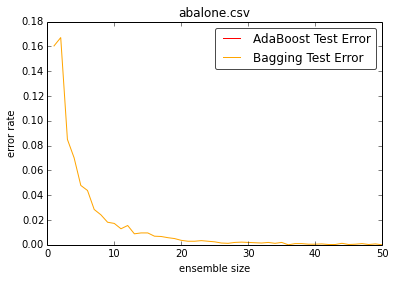

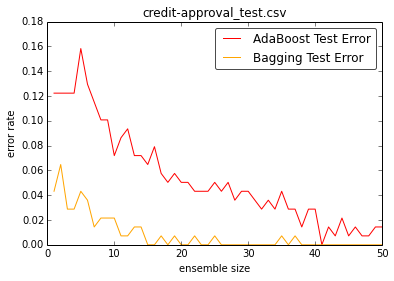

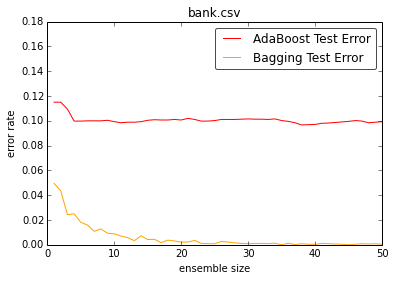

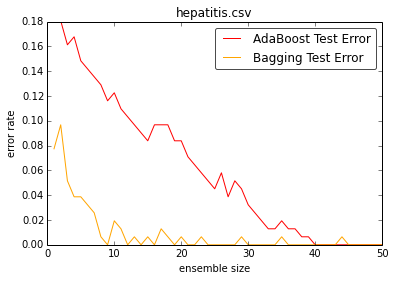

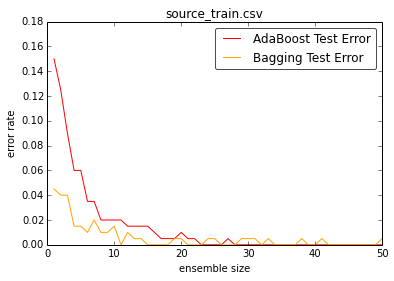

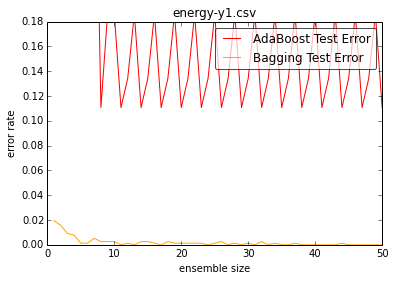

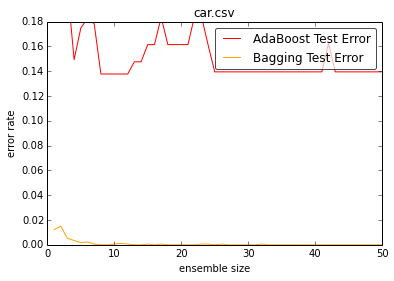

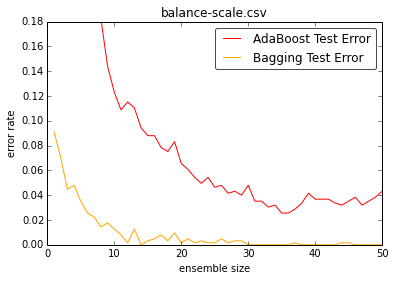

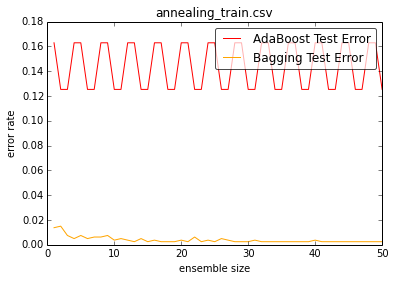

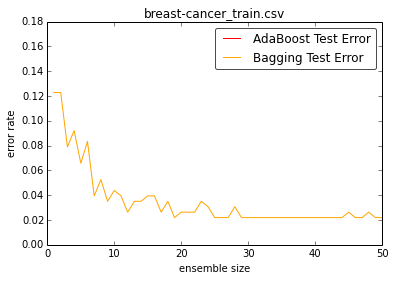

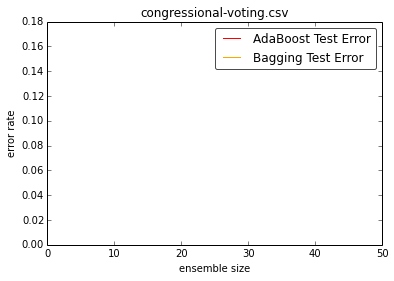

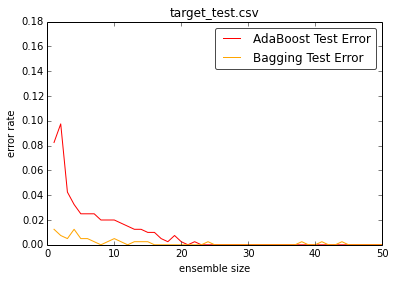

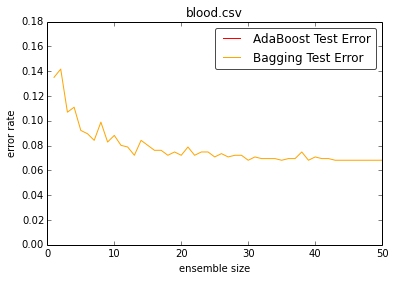

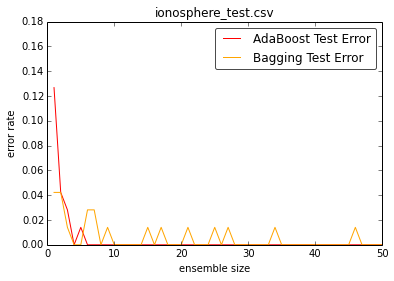

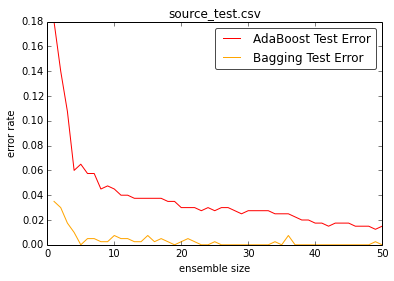

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

n_estimators = 50
#get data
def GetData(filename):
    dataframe = pd.read_csv(filename, header=None)
    dataset = dataframe.values
    Col=len(dataset[0])-1
    X= dataset[:, 0:Col]
    Y=dataset[:, Col]
    return X,Y
def plt_ensemble(filename1,filename):
    X_train,y_train=GetData(filename1)
    X_test,y_test=GetData(filename1)
    #dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
    #dt_stump.fit(X_train, y_train)
    #dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)
    Ada_boost= AdaBoostClassifier(n_estimators=n_estimators)
    Ada_boost.fit(X_train, y_train)

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ada__err = np.zeros((n_estimators,))
    for i, y_pred in enumerate(Ada_boost.staged_predict(X_test)):
        ada__err[i] = zero_one_loss(y_pred, y_test)

    bagging__err = np.zeros((n_estimators,))
    for  i  in range(n_estimators):
        Bagging= BaggingClassifier(n_estimators=i+1)
        Bagging.fit(X_train, y_train)
        bagging__err[i] = 1-Bagging.score(X_test, y_test)

    ax.plot(np.arange(n_estimators) + 1, ada__err,
            label='AdaBoost Test Error',
            color='red')
    ax.plot(np.arange(n_estimators) + 1, bagging__err,
            label='Bagging Test Error',
            color='orange')
    ax.set_ylim((0.0, 0.18))
    ax.set_xlabel('ensemble size')
    ax.set_ylabel('error rate')
    leg = ax.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.7)
    plt.title(filename)
    plt.show()


#filename='/Users/xing/Desktop/test/source_test.csv'
#X_test,y_test=GetData(filename)
#plt_ensemble(filename)

path="/Users/xing/Desktop/test1/"
fileset= os.listdir(path)
for filename in fileset :
    if filename.find(".csv")==-1 :
        continue
    filename1=path+filename
    plt_ensemble(filename1,filename)